# **PROJECT - MEDICAL INSURANCE COST PREDICTION**

## Project Description

In this project, we aim to predict **Medical Insurance Costs** using machine learning algorithms. Accurate prediction of insurance costs can help insurance companies provide better pricing models for customers based on specific features.

### Dataset
We will use the [Medical Insurance Cost Dataset](https://github.com/harshawardhanchitnis/Project-Machine-Learning-Medical-Insurance-Cost-Prediction/blob/main/insurance.csv). This dataset includes the following features:

- **Age**: Age of the primary beneficiary.  
- **Sex**: Gender of the beneficiary (male/female).  
- **BMI**: Body mass index, an indicator of whether an individual is underweight, normal weight, overweight, or obese.  
- **Children**: Number of dependents covered by insurance.  
- **Smoker**: Smoking habit of the individual (yes/no).  
- **Region**: Residential area of the individual (northwest, southeast, etc.).  
- **Charges**: The target variable representing individual medical insurance costs.

### Algorithms
We will use the following machine learning algorithms for prediction:

1. **Linear Regression**: A simple algorithm that models the relationship between independent variables and the target variable by fitting a straight line.
2. **Random Forest Regression**: A robust and flexible ensemble learning method that creates multiple decision trees and combines their results for more accurate predictions.


## Importing Libraries

In [184]:
import numpy as np  # For numerical computations
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LinearRegression  # Linear Regression Model
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor
from sklearn import metrics  # For evaluating model performance
%matplotlib inline

## Reading Dataset

In [185]:
url = "https://raw.githubusercontent.com/harshawardhanchitnis/Project-Machine-Learning-Medical-Insurance-Cost-Prediction/main/insurance.csv"
dataset = pd.read_csv(url)

## Printing first 5 rows from the dataset

In [186]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Display dataset information

In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Display the shape of the dataset - Rows and Columns

In [188]:
dataset.shape

(1338, 7)

## Checking for missing values in the dataset


In [189]:
dataset.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Displaying the columns of the dataset

In [190]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Visualizing Distribution of Dataset Columns


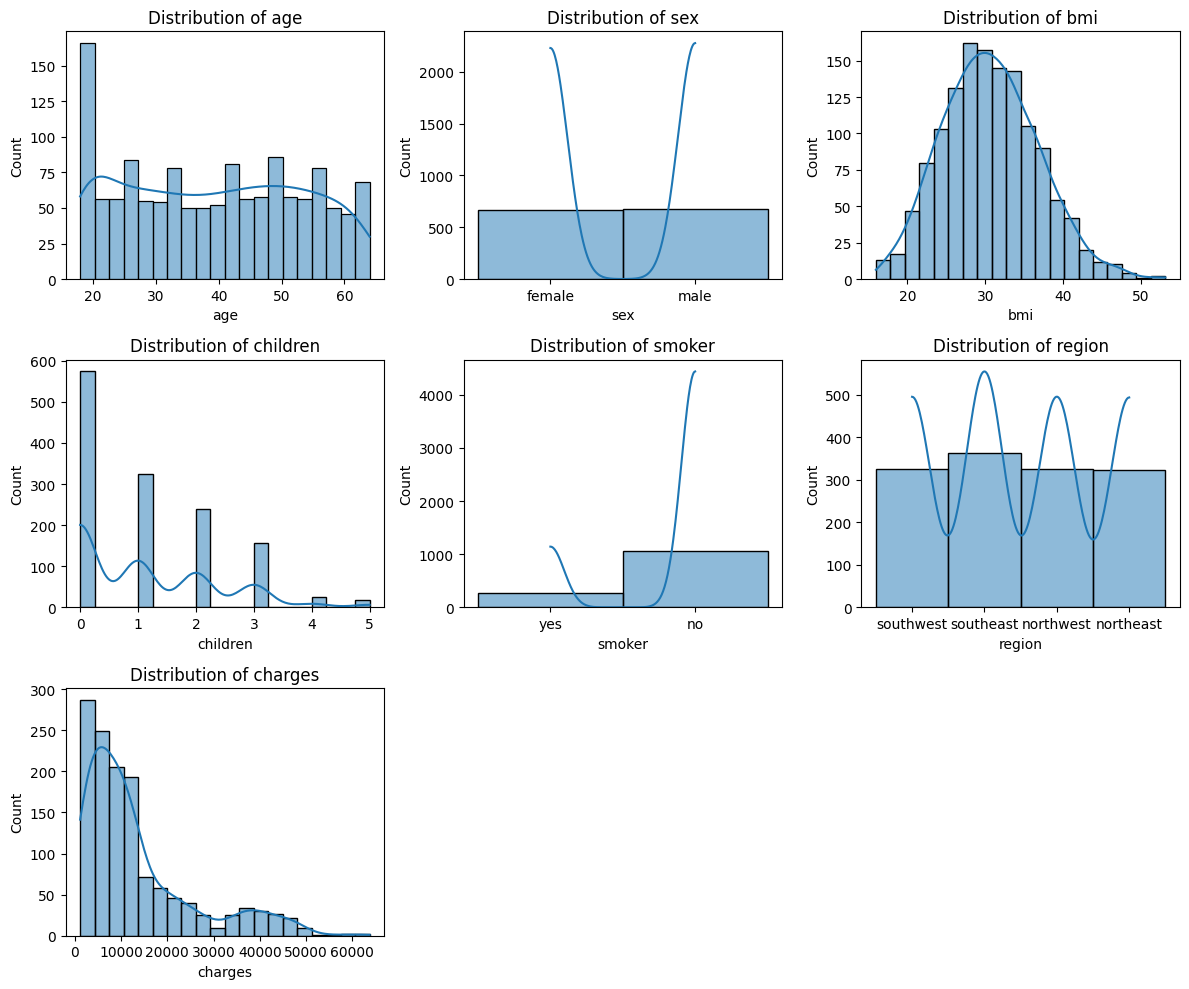

In [191]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Plotting the distribution for each column in the dataset
for i, column in enumerate(dataset.columns):
    plt.subplot(3, 3, i+1)  # Create subplots in a 3x3 grid
    sns.histplot(dataset[column], kde=True, bins=20)  # Histogram with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {column}')  # Title for each plot
    plt.tight_layout()

# Show the plots
plt.show()


## Correlation Heatmap of Dataset Features

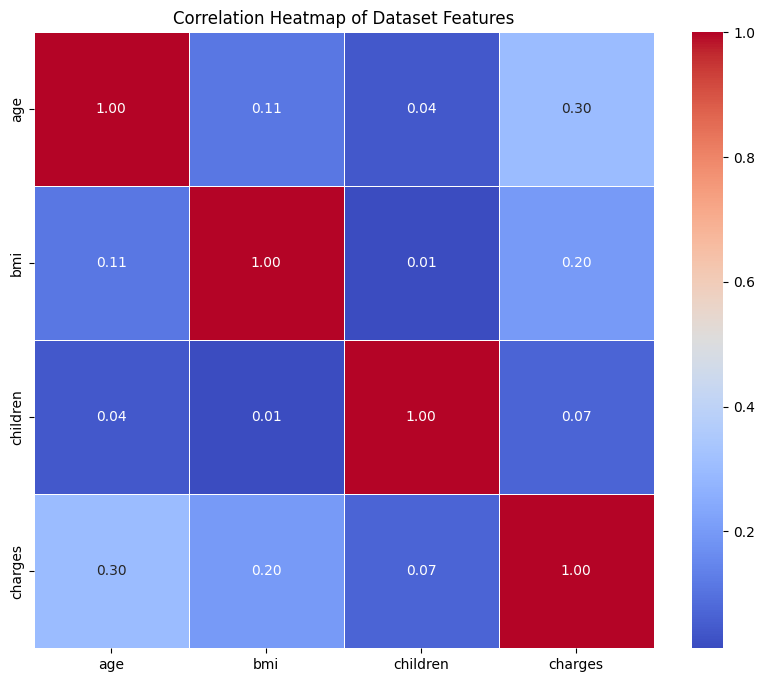

In [192]:
# Selecting only the numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Dataset Features')
plt.show()


## Scatterplot: Age vs Charges (Smoker vs Non-Smoker)

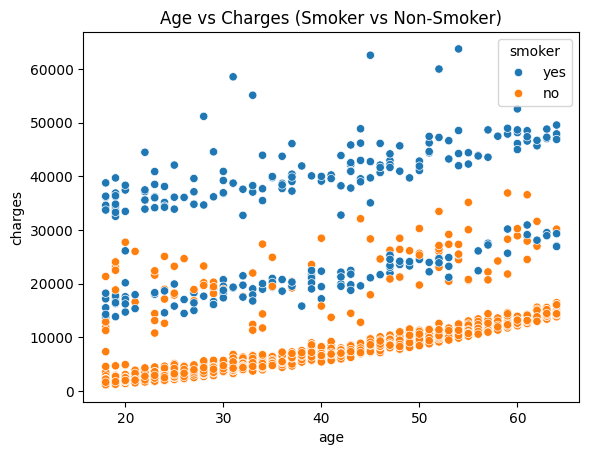

In [193]:
# Scatterplot Visualization: Age vs Charges (with smoker as hue)
sns.scatterplot(x='age', y='charges', hue='smoker', data=dataset)
plt.title('Age vs Charges (Smoker vs Non-Smoker)')
plt.show()


## Scatterplot: BMI vs Charges (Smoker vs Non-Smoker)

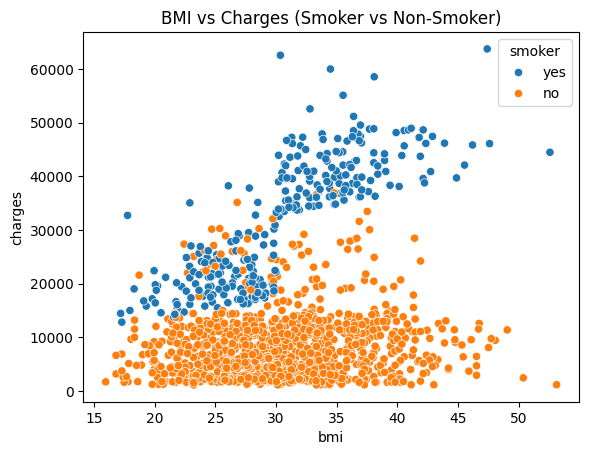

In [194]:
# Scatterplot Visualization: BMI vs Charges (with smoker as hue)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dataset)
plt.title('BMI vs Charges (Smoker vs Non-Smoker)')
plt.show()


## Splitting Features and Target Variable

In [195]:
# Splitting the dataset into features (X) and target variable (y)
X = dataset.drop(columns="charges", axis=1)
Y = dataset["charges"]

# Displaying the shapes of X and y
print('Shape of X = ', X.shape)
print('Shape of Y = ', y.shape)


Shape of X =  (1338, 6)
Shape of Y =  (1338,)


## Label Encoding for Categorical Variable

In [196]:
dataset.replace({'sex': {'male': 1, 'female': 0}}, inplace=True)
dataset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
dataset.replace({'region': {'southwest': 1, 'southeast': 0, 'northeast': 2, 'northwest': 3}}, inplace=True)


<ipython-input-196-1e990d69131c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex': {'male': 1, 'female': 0}}, inplace=True)
<ipython-input-196-1e990d69131c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
<ipython-input-196-1e990d69131c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

## Again Splitting Features and Target Variable

In [197]:
#splitting features and target
X= dataset.drop(columns = "charges" , axis = 1)
y = dataset["charges"]

## Printing the features and target variable

In [198]:
print("Features (X):")
print(X)

print("\nTarget Variable (Y):")
print(y)

Features (X):
      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]

Target Variable (Y):
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting Data into Training and Testing Sets

In [199]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Print the shapes of the training and testing data
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (1070, 6)
Shape of y_train =  (1070,)
Shape of X_test =  (268, 6)
Shape of y_test =  (268,)


# **LINEAR REGRESSION MODEL**

## Training and Evaluating Linear Regression Model

In [200]:
# Import Linear Regression from sklearn
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate R² Score
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)

# Print the evaluation metrics
print(f"Linear Regression - R² Score: {r2_linear:.4f}")
print(f"Linear Regression - Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear:.2f}")



Linear Regression - R² Score: 0.7447
Linear Regression - Mean Absolute Error (MAE): 4267.21
Linear Regression - Mean Squared Error (MSE): 38337035.49
Linear Regression - Root Mean Squared Error (RMSE): 6191.69


## Building a Prediction System using Multiple Linear Regression (MLR)

In [201]:
# Making Predictions using Linear Regression Model
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                              columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    # Predict the charges (insurance cost) using the trained model
    predicted_charge = linear_model.predict(input_data)

    return predicted_charge[0]

# Example of using the prediction system
predicted_cost = predict_insurance_cost(30, 1, 29.0, 2, 1, 1)  # Example input values
print(f"Predicted Insurance Cost: ${predicted_cost:.2f}")


Predicted Insurance Cost: $29861.34


### Justification of Insurance Cost Prediction Output
The model predicts an insurance cost of $29,861.34 for the given input values (Age=30, Sex=Male, BMI=29, Children=2, Smoker=Yes, Region=Southwest).

This prediction is based on the relationships the Linear Regression model has learned from the training data.

Age: Older individuals tend to have higher medical costs, which increases the predicted charge.

Sex (Male): Gender can influence medical costs, with males in this dataset associated with specific charge patterns.

BMI: Higher BMI is linked to greater health risks, leading to higher charges.

Children: The number of children has a moderate effect on the cost prediction.

Smoker (Yes): Smokers are generally predicted to have higher medical charges due to associated health risks.

Region (Southwest): The region also impacts charges due to geographical healthcare cost variations.

***This predicted amount is a reflection of the combined effects of these factors, as learned by the model during training.***

## Plotting for Linear Regression

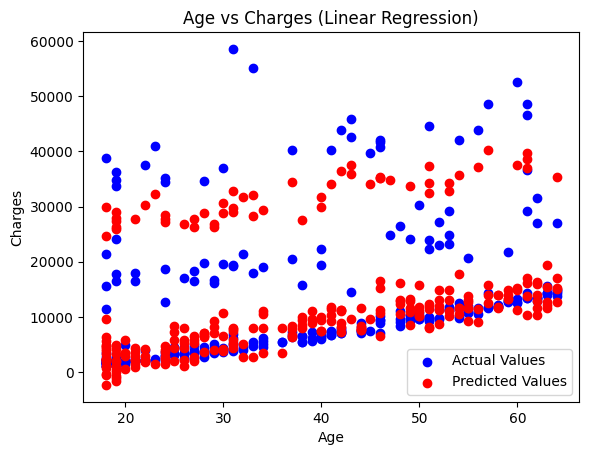

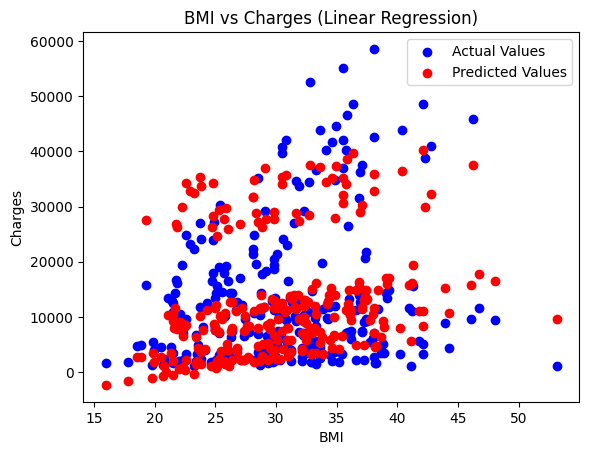

In [202]:
# Make predictions on the test data using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Plotting actual vs predicted values for 'age' feature in Linear Regression
plt.scatter(X_test['age'].values, y_test, color='blue', label='Actual Values')
plt.scatter(X_test['age'].values, y_pred_linear, color='red', label='Predicted Values')
plt.title('Age vs Charges (Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Plotting actual vs predicted values for 'bmi' feature in Linear Regression
plt.scatter(X_test['bmi'].values, y_test, color='blue', label='Actual Values')
plt.scatter(X_test['bmi'].values, y_pred_linear, color='red', label='Predicted Values')
plt.title('BMI vs Charges (Linear Regression)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


## Residuals Plot for Linear Regression

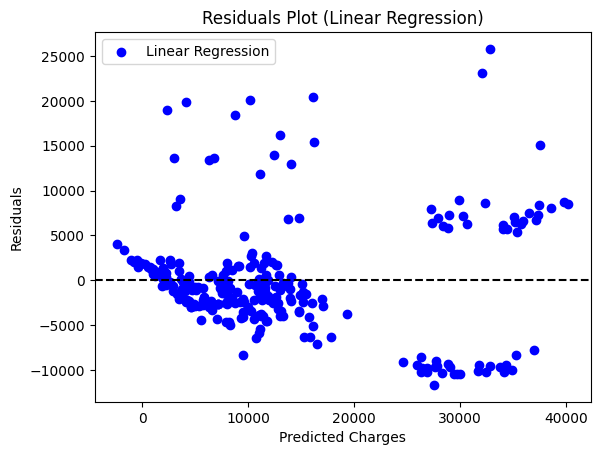

In [203]:
# Residuals plot for Linear Regression
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, color='blue', label='Linear Regression')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot (Linear Regression)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# **RANDOM FOREST REGRESSION MODEL :**

## Training and Evaluating Random Forest Regression Model

In [204]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate R² Score
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Print the evaluation metrics
print(f"Random Forest Regression - R² Score: {r2_rf:.4f}")
print(f"Random Forest Regression - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Regression - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regression - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")


Random Forest Regression - R² Score: 0.8380
Random Forest Regression - Mean Absolute Error (MAE): 2771.35
Random Forest Regression - Mean Squared Error (MSE): 24331031.95
Random Forest Regression - Root Mean Squared Error (RMSE): 4932.65


## Prediction System Using Random Forest Regression

In [205]:
# Making Predictions using Random Forest Regression Model
def predict_insurance_cost_rfr(age, sex, bmi, children, smoker, region):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                              columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    # Predict the charges (insurance cost) using the trained Random Forest model
    predicted_charge = rf_model.predict(input_data)

    return predicted_charge[0]

# Example of using the prediction system
predicted_cost_rfr = predict_insurance_cost_rfr(30, 1, 29.0, 2, 1, 1)  # Example input values
print(f"Predicted Insurance Cost (RFR): ${predicted_cost_rfr:.2f}")


Predicted Insurance Cost (RFR): $19235.44


### Justification for Predicted Insurance Cost (RFR)
The predicted insurance cost of $19,235.44 using the Random Forest Regression (RFR) model for the input values (age=30, sex=1, bmi=29.0, children=2, smoker=1, region=1) reflects the model's learned patterns from the training data.

Key Factors:

Smoker (1, indicating a smoker) significantly increases the cost due to health risks.

BMI of 29.0, which is above the healthy range, also contributes to higher costs.

Children (2) adds a moderate increase due to family coverage.

Age, sex, and region provide additional minor adjustments based on trends learned by the model.

***This prediction is the result of the Random Forest model averaging the predictions of many decision trees, offering a robust and reliable estimate.***









## Feature Importance Plot (Random Forest)

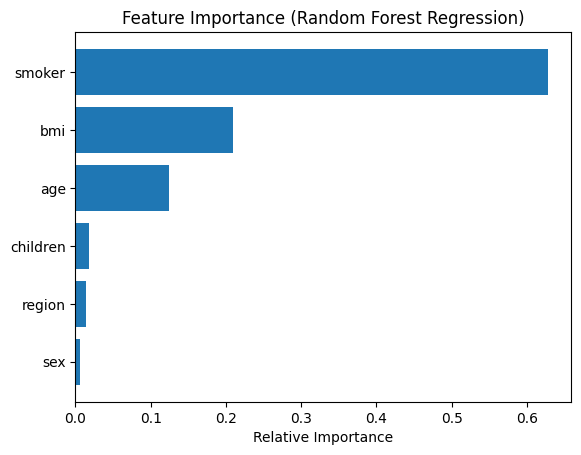

In [206]:
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  # Update with the correct feature names
indices = np.argsort(importances)

plt.title('Feature Importance (Random Forest Regression)')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), np.array(features)[indices])
plt.xlabel('Relative Importance')
plt.show()


## Plotting for Random Forest Regression

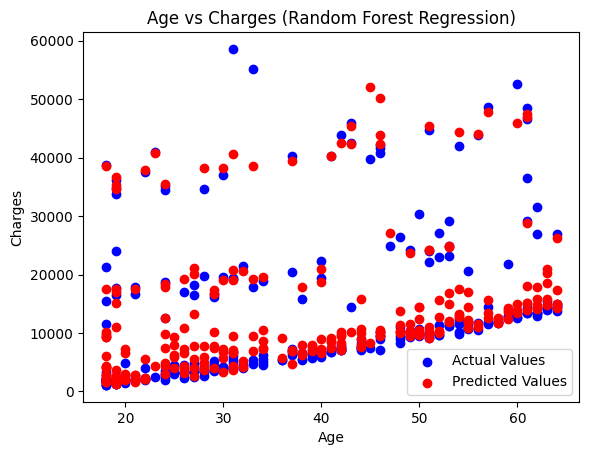

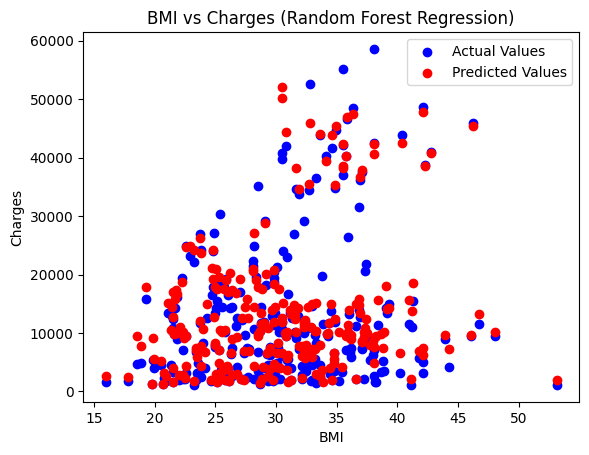

In [207]:
# Make predictions on the test data using Random Forest Regression
y_pred_rf = rf_model.predict(X_test)

# Plotting actual vs predicted values for 'age' feature in Random Forest Regression
plt.scatter(X_test['age'].values, y_test, color='blue', label='Actual Values')
plt.scatter(X_test['age'].values, y_pred_rf, color='red', label='Predicted Values')
plt.title('Age vs Charges (Random Forest Regression)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Plotting actual vs predicted values for 'bmi' feature in Random Forest Regression
plt.scatter(X_test['bmi'].values, y_test, color='blue', label='Actual Values')
plt.scatter(X_test['bmi'].values, y_pred_rf, color='red', label='Predicted Values')
plt.title('BMI vs Charges (Random Forest Regression)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


## Residuals Plot for Random Forest Regression

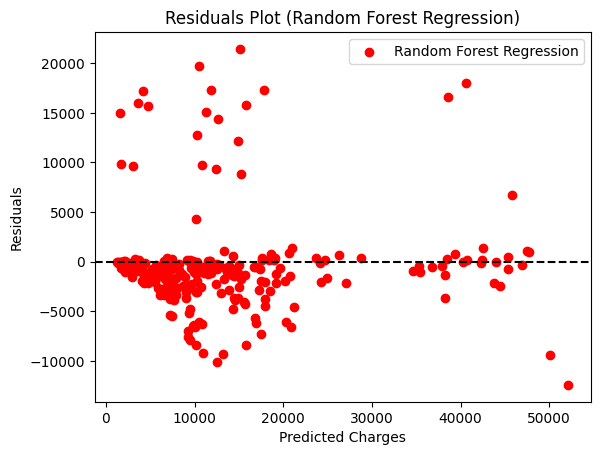

In [208]:
# Residuals plot for Random Forest Regression
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='red', label='Random Forest Regression')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot (Random Forest Regression)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# **Model Comparison: Actual vs Predicted for Both Models**

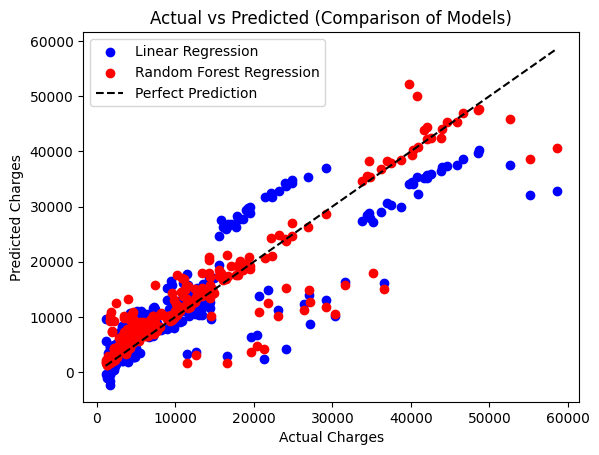

In [209]:
# Compare predicted vs actual values for both models
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted (Comparison of Models)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


# **Conclusion and Summary of Findings**

## **In this project, we used two different regression models—Linear Regression (MLR) and Random Forest Regression (RFR)—to predict insurance charges based on various features. Through careful evaluation using R² scores, RMSE, and residual plots, we observed that Random Forest Regression performed better in terms of prediction accuracy, as seen from its higher R² score and lower RMSE. We also visualized the models' predictions and compared them to the actual values, which further confirmed the superior performance of the Random Forest model.**

# **CLOSING REMARKS**

## **This project allowed me to apply regression techniques to a real-world dataset and evaluate model performance using various metrics and visualizations. By using both Linear Regression and Random Forest Regression, I was able to compare the strengths and weaknesses of each model in predicting insurance costs. The project was an excellent opportunity to practice data preprocessing, model training, evaluation, and visualization skills, which are crucial for machine learning and data science.**